In [4]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Function to fetch historical data for a given ticker and period
def fetch_data(ticker, period):
    stock = yf.Ticker(ticker)
    return stock.history(period=period)


def plot_stock(data, label, color):
    plt.plot(data.index, data['Close'], label=f"{label} Close Price", color=color)


# Function to calculate and plot normalized data
def plot_normalized_data(data, ticker, color, subplot):
    rolling_mean = data["Close"].rolling(window=30).mean()
    normalized_data = data["Close"] / rolling_mean
    subplot.plot(data.index, normalized_data, label=ticker, color=color)
    subplot.set_title(f"Normalized Stock Prices for {ticker}")
    subplot.set_ylabel("Normalized Closing Price")

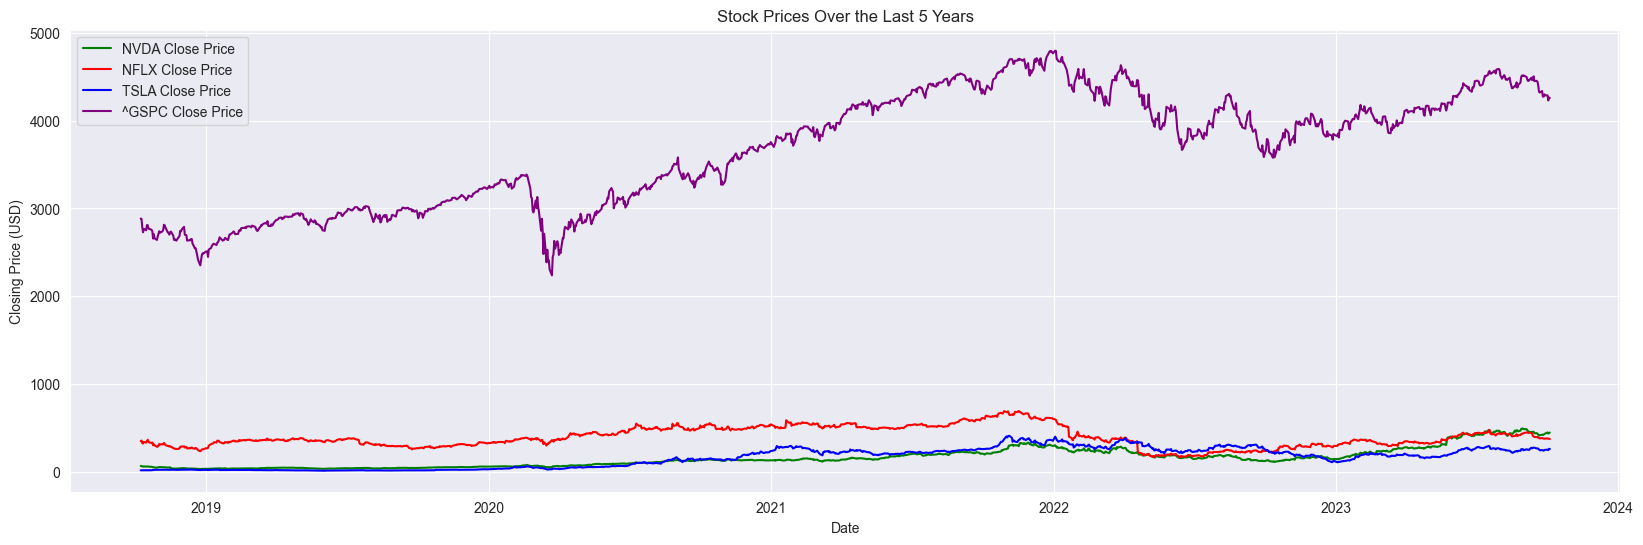

In [7]:
# Tickers and period
tickers = ["NVDA", "NFLX", "TSLA","^GSPC"]
colors = ["green", "red", "blue", "purple" ]# Added "^GSPC" for S&P 500
ticker_colors = {ticker: color for ticker, color in zip(tickers, colors)}
period = "5y"

# Fetch and plot historical data for each stock
plt.figure(figsize=(20, 6))
  # Added a color for S&P 500
for ticker, color in zip(tickers, colors):
    stock_data = fetch_data(ticker, period)
    plot_stock(stock_data, ticker, color)

plt.title("Stock Prices Over the Last 5 Years")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

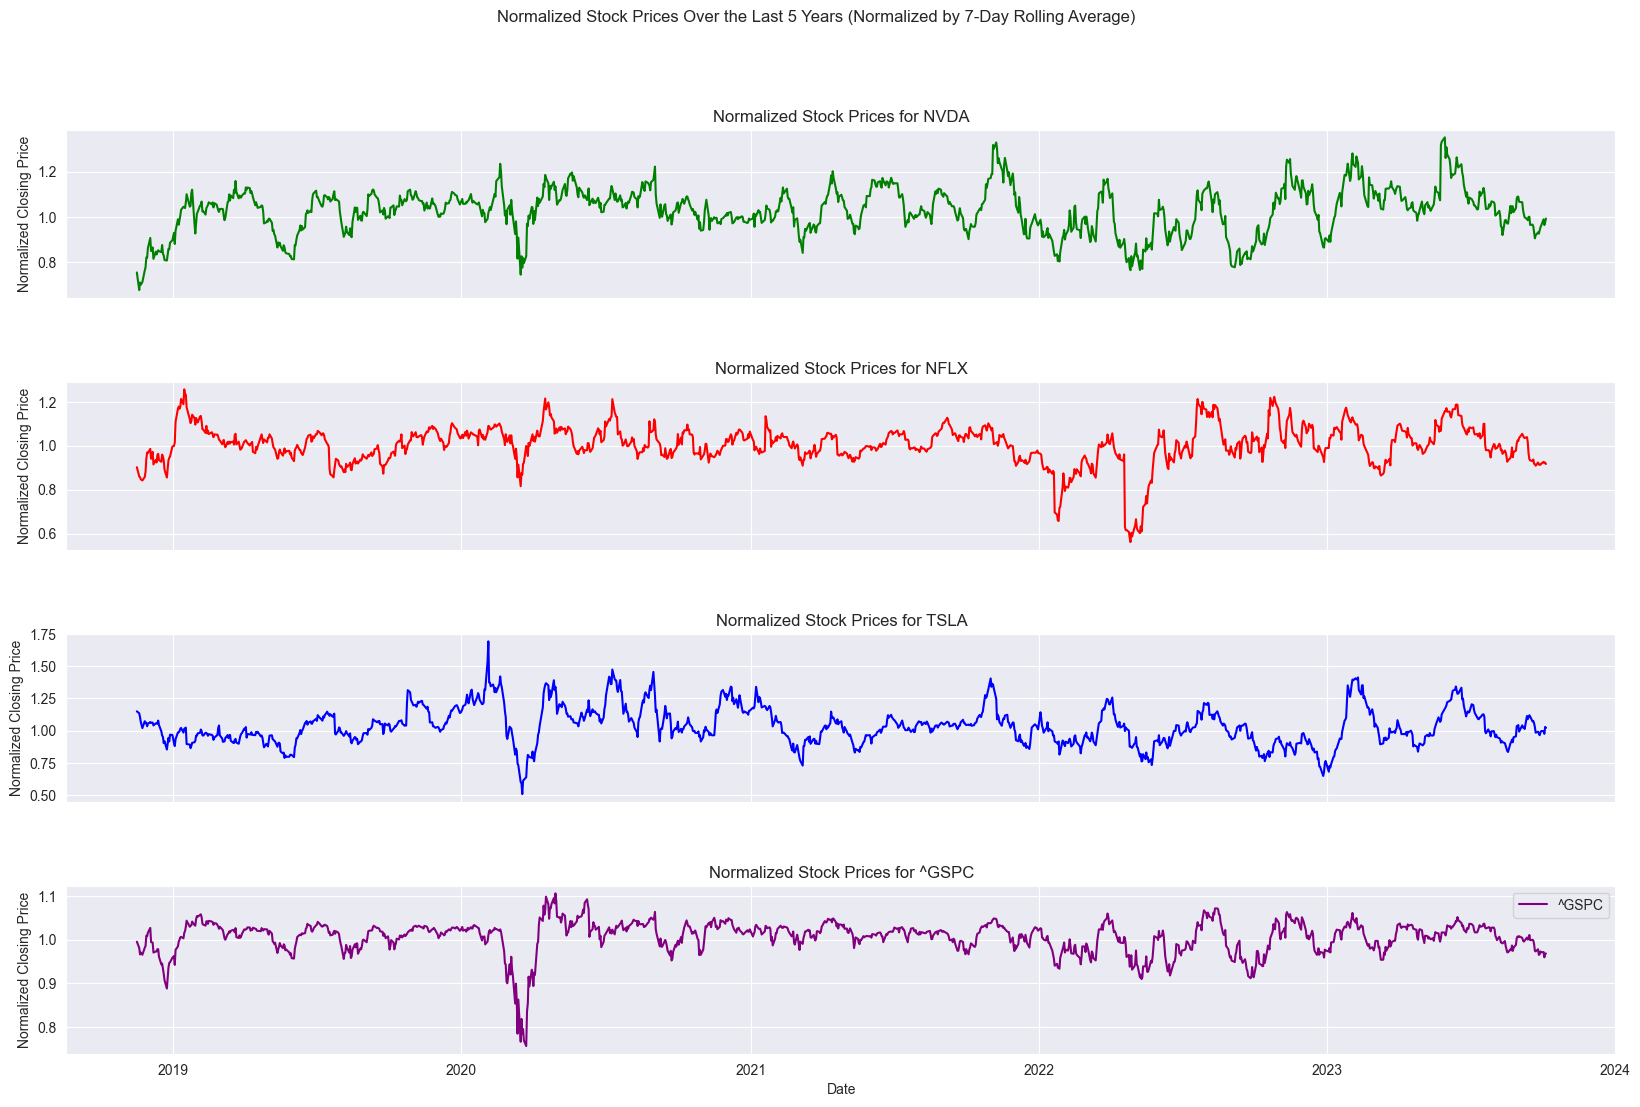

In [8]:
# Create a figure with multiple subplots for normalized data
fig, axs = plt.subplots(len(tickers), 1, figsize=(20, 12), sharex=True)

# Fetch and plot normalized data for each stock
for i, (ticker, color) in enumerate(zip(tickers, colors)):
    stock_data = fetch_data(ticker, period)
    plot_normalized_data(stock_data, ticker, color, axs[i])

plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots
plt.suptitle("Normalized Stock Prices Over the Last 5 Years (Normalized by 7-Day Rolling Average)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

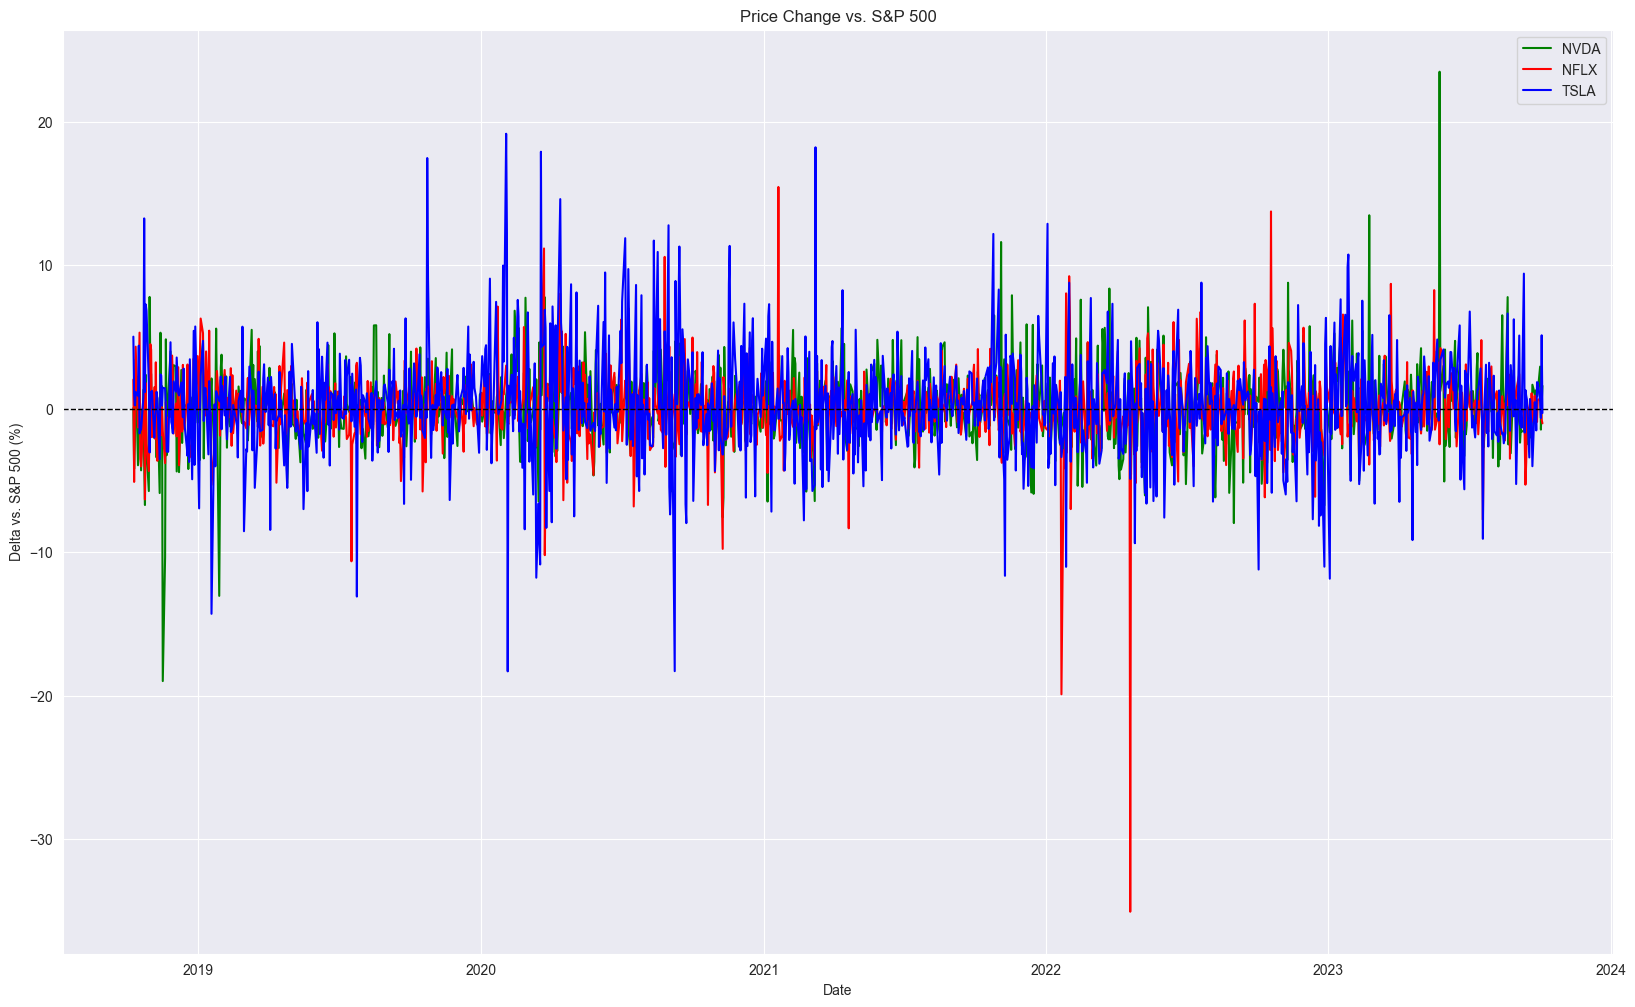

In [9]:
data = {}
for ticker in tickers:
    data[ticker] = fetch_data(ticker, period)

# Calculate daily price delta (percentage change) for each stock and the S&P 500
for ticker in data:
    data[ticker]['Delta'] = data[ticker]['Close'].pct_change() * 100

# Calculate the difference between each stock's delta and the S&P 500 delta
for ticker in tickers[:-1]:  # Exclude S&P 500 in the loop
    data[ticker]['Delta vs S&P 500'] = data[ticker]['Delta'] - data['^GSPC']['Delta']

# Create a plot to visualize the differences
plt.figure(figsize=(20, 12))
for ticker, color in zip(tickers[:-1], colors[:-1]):  # Exclude S&P 500
    plt.plot(data[ticker].index, data[ticker]['Delta vs S&P 500'], label=ticker, color=color)

plt.title("Price Change vs. S&P 500")
plt.xlabel("Date")
plt.ylabel("Delta vs. S&P 500 (%)")
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.show()

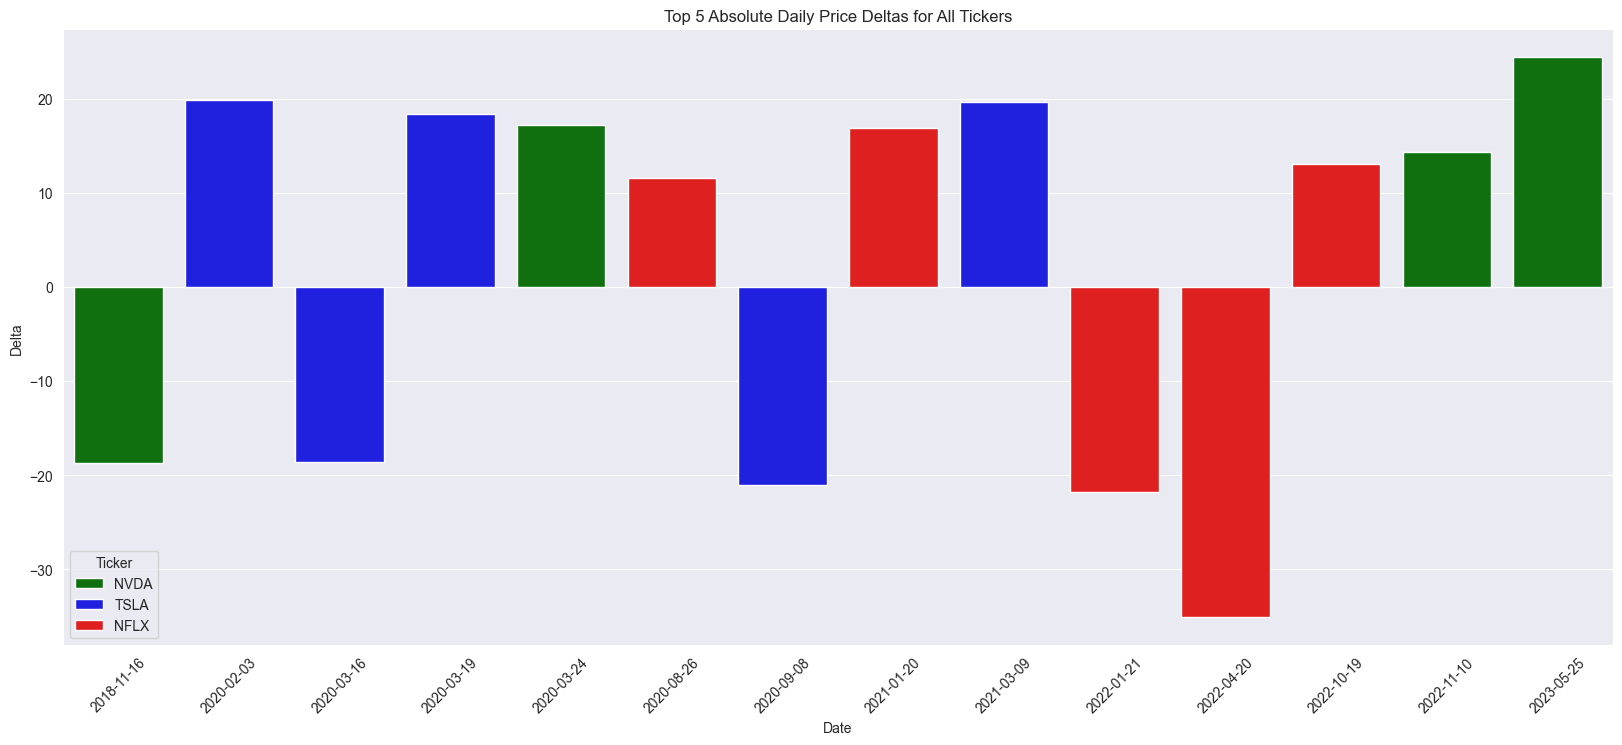

In [10]:
# Create a color palette for the tickers

# Create an empty DataFrame to store all the top deltas
all_top_deltas = pd.DataFrame(columns=['Date', 'Delta', 'Ticker'])

# Populate the DataFrame with data from each ticker
for i, ticker in enumerate(tickers[:-1]):  # Exclude S&P 500
    top_absolute_deltas = data[ticker]['Delta'].abs().nlargest(5)
    top_deltas_with_signal = data[ticker].loc[top_absolute_deltas.index]

    # Sort the data by date (earliest to latest)
    top_deltas_with_signal.sort_index(inplace=True)  # Added this line to sort by date

    # Format the date in a more readable way
    top_deltas_with_signal['Date'] = top_deltas_with_signal.index.strftime('%d-%m-%Y')

    # Add the ticker information
    top_deltas_with_signal['Ticker'] = ticker

    # Concatenate the data for this ticker to all_top_deltas
    all_top_deltas = pd.concat([all_top_deltas, top_deltas_with_signal])  # Concatenate data for this ticker

# Sort the entire DataFrame by Date (earliest to latest) and Delta (highest to lowest)
all_top_deltas['Date'] = pd.to_datetime(all_top_deltas['Date'], format='%d-%m-%Y')
all_top_deltas = all_top_deltas.sort_values(by=['Date', 'Delta'], ascending=[True, False])

# Modify the DataFrame to keep only the date portion
all_top_deltas['Date'] = all_top_deltas['Date'].dt.date  # Keep only the date portion

# Create a single bar chart for all top deltas with different colors
plt.figure(figsize=(20, 8))


# Set dodge=False to reduce the gap between bars
sns.barplot(x='Date', y='Delta', hue='Ticker', data=all_top_deltas, palette=ticker_colors, dodge=False)

plt.xlabel('Date')
plt.ylabel('Delta')
plt.title('Top 5 Absolute Daily Price Deltas for All Tickers')
plt.xticks(rotation=45)
plt.legend(title='Ticker')

# Show the single chart
plt.show()


In [11]:
print(all_top_deltas.to_string(index=False))
#nvidia site:https://www.bloomberg.com OR site:https://www.infomoney.com OR site:https://www.reuters.com OR site:https://www.wsj.com OR site:https://finance.google.com OR site:https://finance.yahoo.com


      Date      Delta Ticker       Open       High        Low      Close      Volume  Dividends  Stock Splits  Delta vs S&P 500
2018-11-16 -18.755881   NVDA  40.475910  42.294995  40.052115  40.750999 196352000.0        0.0           0.0        -18.978211
2020-02-03  19.894859   TSLA  44.912666  52.409332  44.901333  52.000000 705975000.0        0.0           0.0         19.169398
2020-03-16 -18.452073   NVDA  52.932103  56.343621  48.344371  48.942444  72697200.0        0.0           0.0         -6.468018
2020-03-16 -18.577806   TSLA  31.299999  32.991333  29.478001  29.671333 307342500.0        0.0           0.0         -6.593751
2020-03-19  18.387684   TSLA  24.980000  30.133333  23.897333  28.509333 452932500.0        0.0           0.0         17.916903
2020-03-24  17.156404   NVDA  57.066284  62.962304  56.829547  62.095093 110164400.0        0.0           0.0          7.773630
2020-08-26  11.608717   NFLX 492.500000 549.039978 492.079987 547.530029  20373700.0        0.0         

In [12]:
foo = Article("https://finance.yahoo.com/news/netflix-q1-earnings-2020-194103428.html")
foo.download()
foo.html
foo.parse()

NameError: name 'Article' is not defined

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Define the paths to the JSON files
file_paths = [
    "data/netflix.json",
    "data/tesla.json",
    "data/nvidia.json"
]

# Create an empty list to store DataFrames
dfs = []

# Iterate through JSON files and extract data
for file_path in file_paths:
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
        ticket = data["ticket"]
        articles = data["articles"]
        for article in articles:
            publish_date = article["publish_date"]
            dfs.append(pd.DataFrame({"Date": [publish_date], "Ticket": [ticket]}))

# Concatenate the list of DataFrames into one DataFrame
data_df = pd.concat(dfs, ignore_index=True)

# Convert the Date column to a pandas datetime object
data_df["Date"] = pd.to_datetime(data_df["Date"], format="%m/%d/%Y")

# Group the data by month and ticket and count the number of articles
grouped_data = data_df.groupby([data_df["Date"].dt.to_period("M"), "Ticket"]).size().reset_index(name="Count")

# Create the scatter plot
plt.figure(figsize=(12, 6))

# Iterate through unique tickets and plot for each ticket with a different color
# Iterate through unique tickets and plot for each ticket with a different color
colors = {"nflx": "red", "tsla": "blue", "nvda": "green"}
for ticket, color in colors.items():
    subset = grouped_data[grouped_data["Ticket"] == ticket]

    # Use .loc to modify the DataFrame
    subset.loc[:, "Date"] = subset["Date"].dt.to_timestamp()

    plt.scatter(subset["Date"], subset["Count"], label=ticket.capitalize(), color=color)


# Customize the plot
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.title("Number of Articles by Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
# Calculate the total number of articles by ticket
total_articles_by_ticket = grouped_data.groupby("Ticket")["Count"].sum().reset_index()

# Print the list
print(total_articles_by_ticket)
# Show the plot
plt.tight_layout()
plt.show()


In [56]:
#deltas utilizados para analisar a movimentação do preço
deltas = [-7, -5, -3, 0, 3, 5, 7]

def get_stock_mov(ticket, publish_date):
    delta_results = {"Date": [], "Ticket": []}
    publish_date_formatted = pd.to_datetime(publish_date, format="%m/%d/%Y")

    for delta in deltas:
        # Calculate the date for the delta
        delta_date = publish_date_formatted + pd.DateOffset(days=delta)

        # Download stock data for the delta date
        delta_stock_data = yf.download(ticket, start=delta_date, end=delta_date)

        if delta_stock_data.empty:
            delta_price = None  # Data not available for this delta
        else:
            delta_price = delta_stock_data.iloc[0]['Adj Close']

        delta_results["Date"].append(delta_date.strftime("%m/%d/%Y"))  # Convert to string
        delta_results["Ticket"].append(f"{ticket}_delta_{delta}")
        delta_results[f"delta_{delta}"] = [delta_price]

    return pd.DataFrame(delta_results)

In [57]:
import json
file_paths = [
    "scored_data_title_only/nflx.json",
    "scored_data_title_only/tsla.json",
    "scored_data_title_only/nvda.json"
]

# Create an empty list to store DataFrames
dfs = []

# Iterate through JSON files and extract data
for file_path in file_paths:
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
        ticket = file_path.split("/")[-1].split(".json")[0]
        for article in data:
            publish_date = article["publish_date"]
            title = article["title"]
            score_raw = article["vader_score_raw"]["compound"]
            score_lemmatized = article["vader_score_lemmatized"]["compound"]
            score_steemed = article["vader_score_steemed"]["compound"]
            score_stopwords = article["vader_score_stopwords"]["compound"]
            stock_movement = get_stock_mov(ticket, publish_date)
             # Check if stock_movement is not None (data available)
            if stock_movement is not None:
                # Create a dictionary with all the values
                data_dict = {
                    "Date": [publish_date],
                    "Ticket": [ticket],
                    "score_raw": [score_raw],
                    "score_lemmatized": [score_lemmatized],
                    "score_steemed": [score_steemed],
                    "score_stopwords": [score_stopwords]
                }

                # Add stock movement data to the dictionary
                for _, row in stock_movement.iterrows():
                    data_dict[row["Ticket"]] = [row[f"delta_{delta}"] for delta in deltas]

                # Append the dictionary as a DataFrame to the list dfs
                dfs.append(pd.DataFrame(data_dict))

# Concatenate the list of DataFrames into one DataFrame
data_df = pd.concat(dfs, ignore_index=True)

# Convert the Date column to a pandas datetime object
data_df["Date"] = pd.to_datetime(data_df["Date"], format="%m/%d/%Y")

print(data_df)

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-15 00:00:00 -> 2020-04-15 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-17 00:00:00 -> 2020-04-17 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-19 00:00:00 -> 2020-04-19 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-22 00:00:00 -> 2020-04-22 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-25 00:00:00 -> 2020-04-25 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-27 00:00:00 -> 2020-04-27 00:00:00)')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['NFLX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-04-29 00:00:00 -> 2020-04-29 00:00:00)')


ValueError: All arrays must be of the same length